In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [3]:
df = pd.read_csv("Vanderbilt Univ Case Dataset.csv")

In [4]:
df

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,10/10/2011,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,10/11/2011,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,10/12/2011,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,10/13/2011,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,10/14/2011,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,9/10/2012,Mon,33,49,68,71,82,84,86,86,86,86,91,97,101,103,109,110,118
237,9/11/2012,Tue,31,56,68,70,74,78,78,78,78,80,88,94,97,98,98,99,108
238,9/12/2012,Wed,39,49,69,78,81,82,82,82,85,88,96,99,99,100,104,115,121
239,9/13/2012,Thu,34,51,68,77,75,75,75,79,89,92,98,99,99,97,101,106,114


In [5]:
df.head()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,10/10/2011,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,10/11/2011,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,10/12/2011,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,10/13/2011,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,10/14/2011,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [6]:
df.tail()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
236,9/10/2012,Mon,33,49,68,71,82,84,86,86,86,86,91,97,101,103,109,110,118
237,9/11/2012,Tue,31,56,68,70,74,78,78,78,78,80,88,94,97,98,98,99,108
238,9/12/2012,Wed,39,49,69,78,81,82,82,82,85,88,96,99,99,100,104,115,121
239,9/13/2012,Thu,34,51,68,77,75,75,75,79,89,92,98,99,99,97,101,106,114
240,9/14/2012,Fri,27,41,63,63,63,63,66,72,73,76,76,77,78,81,86,101,102


In [7]:
df.isnull().sum()

SurgDate    0
DOW         0
T - 28      0
T - 21      0
T - 14      0
T - 13      0
T - 12      0
T - 11      0
T - 10      0
T - 9       0
T - 8       0
T - 7       0
T - 6       0
T - 5       0
T - 4       0
T - 3       0
T - 2       0
T - 1       0
Actual      0
dtype: int64

In [ ]:
df.describe()

,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,34.261411,47.240664,64.439834,67.817427,70.502075,72.365145,74.946058,78.041494,82.336100,86.000000,89.269710,92.091286,94.688797,97.373444,101.165975,110.008299,116.381743
std,9.387610,11.321079,13.495891,14.200934,14.873109,14.970786,15.096674,15.054842,15.594841,16.089075,16.911962,17.370472,17.468264,17.589816,17.547004,17.785057,17.629388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000
25%,28.000000,41.000000,58.000000,62.000000,64.000000,66.000000,68.000000,71.000000,76.000000,80.000000,82.000000,84.000000,88.000000,91.000000,95.000000,102.000000,110.000000
50%,35.000000,48.000000,65.000000,69.000000,72.000000,74.000000,77.000000,79.000000,85.000000,87.000000,91.000000,94.000000,97.000000,100.000000,103.000000,112.000000,117.000000
75%,40.000000,55.000000,73.000000,76.000000,80.000000,82.000000,84.000000,86.000000,92.000000,95.000000,99.000000,103.000000,106.000000,107.000000,111.000000,119.000000,126.000000
max,57.000000,73.000000,93.000000,99.000000,102.000000,106.000000,106.000000,112.000000,113.000000,118.000000,121.000000,121.000000,124.000000,127.000000,131.000000,139.000000,145.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SurgDate  241 non-null    object
 1   DOW       241 non-null    object
 2   T - 28    241 non-null    int64 
 3   T - 21    241 non-null    int64 
 4   T - 14    241 non-null    int64 
 5   T - 13    241 non-null    int64 
 6   T - 12    241 non-null    int64 
 7   T - 11    241 non-null    int64 
 8   T - 10    241 non-null    int64 
 9   T - 9     241 non-null    int64 
 10  T - 8     241 non-null    int64 
 11  T - 7     241 non-null    int64 
 12  T - 6     241 non-null    int64 
 13  T - 5     241 non-null    int64 
 14  T - 4     241 non-null    int64 
 15  T - 3     241 non-null    int64 
 16  T - 2     241 non-null    int64 
 17  T - 1     241 non-null    int64 
 18  Actual    241 non-null    int64 
dtypes: int64(17), object(2)
memory usage: 35.9+ KB


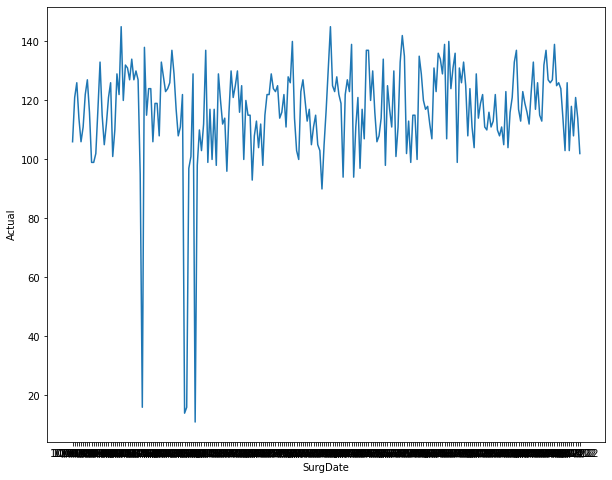

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x="SurgDate", y="Actual", data = df)

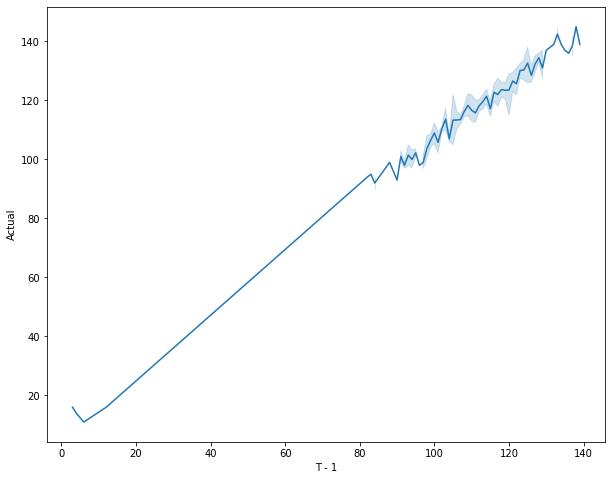

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x="T - 1", y="Actual", data = df)

In [ ]:
cat_cols=["DOW"]

In [ ]:
l = LabelEncoder()
for i in cat_cols:
    df[i]=l.fit_transform(df[i])
df

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,10/10/2011,1,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,10/11/2011,3,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,10/12/2011,4,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,10/13/2011,2,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,10/14/2011,0,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,9/10/2012,1,33,49,68,71,82,84,86,86,86,86,91,97,101,103,109,110,118
237,9/11/2012,3,31,56,68,70,74,78,78,78,78,80,88,94,97,98,98,99,108
238,9/12/2012,4,39,49,69,78,81,82,82,82,85,88,96,99,99,100,104,115,121
239,9/13/2012,2,34,51,68,77,75,75,75,79,89,92,98,99,99,97,101,106,114


In [ ]:
Train = df[:226]
Train

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,10/10/2011,1,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,10/11/2011,3,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,10/12/2011,4,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,10/13/2011,2,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,10/14/2011,0,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,8/17/2012,0,24,31,54,54,54,59,65,74,81,83,82,82,88,92,94,106,115
222,8/20/2012,1,41,51,74,78,81,84,84,85,85,86,91,90,96,108,112,116,113
223,8/21/2012,3,29,39,73,75,77,83,83,83,88,93,97,105,109,110,112,123,132
224,8/22/2012,4,30,38,78,80,86,87,87,90,95,98,102,106,106,106,112,127,137


In [ ]:
v_data = df[226:]
v_data

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
226,8/24/2012,0,29,34,67,67,67,67,75,91,95,104,104,104,108,115,119,126,126
227,8/27/2012,1,40,44,66,69,79,82,85,85,86,92,98,107,109,111,116,123,127
228,8/28/2012,3,34,56,69,84,91,94,94,94,99,103,110,119,124,125,128,139,139
229,8/29/2012,4,36,57,76,81,87,87,87,92,99,101,102,104,103,103,107,114,125
230,8/30/2012,2,29,59,86,88,88,88,97,102,105,106,112,113,113,113,115,124,126
231,8/31/2012,0,19,38,58,58,58,62,68,71,80,86,86,86,94,93,99,116,124
232,9/4/2012,3,23,36,51,57,66,72,73,73,74,80,84,92,105,106,106,116,114
233,9/5/2012,4,27,37,47,54,60,60,60,61,70,70,74,81,81,82,85,95,103
234,9/6/2012,2,23,42,70,80,81,81,87,86,93,99,105,105,105,106,108,119,126
235,9/7/2012,0,10,21,48,48,48,50,56,60,65,68,68,68,68,67,82,91,103


In [ ]:
X = Train.drop(['SurgDate','Actual'], axis = 1)
y = Train['Actual']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

NameError: ignored

In [ ]:
pred_train = lm.predict(X_train)

In [ ]:
pred_test = lm.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_train, pred_train))
print('MSE:', metrics.mean_squared_error(y_train, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))

MAE: 3.41184966975673
MSE: 19.571799409922154
RMSE: 4.424002645786071


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

MAE: 3.832642229379641
MSE: 27.573683080140796
RMSE: 5.251064947240778


In [ ]:
X1 = v_data.drop(['SurgDate','Actual'], axis = 1)
y1 = v_data['Actual']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2,random_state=42)

In [ ]:
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X1_train,y1_train)

LinearRegression()

In [ ]:
pred_train = lm.predict(X1_train)

In [ ]:
pred_test = lm.predict(X1_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y1_train, pred_train))
print('MSE:', metrics.mean_squared_error(y1_train, pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_train, pred_train)))

MAE: 8.289665250534503e-15
MSE: 1.5146129380243427e-28
RMSE: 1.2306961192854808e-14


In [ ]:
print('MAE:', metrics.mean_absolute_error(y1_test, pred_test))
print('MSE:', metrics.mean_squared_error(y1_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, pred_test)))

MAE: 5.045543957606867
MSE: 29.57051838966362
RMSE: 5.437878114638431
